In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [24]:
import pandas as pd
df = pd.read_csv('global_warming_dataset.csv')
df.head()


,Country,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,...,Waste_Management,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature
0,Country_103,1913,-1.163537,887606100.4,1.627978e+08,54.872178,6.139890e+12,76.710013,8317625.641,8.111839,...,82.691409,2.285351,4.060975,150.285539,90.073356,8.025470,39.163860,1480.164332,78.870012,20.825292
1,Country_180,1950,-0.432122,449751674.3,4.281359e+08,84.051006,2.601450e+12,68.450021,6206539.744,42.025915,...,59.322883,17.411668,85.300604,27.305922,88.289837,8.021719,28.252554,1482.730048,32.600905,28.720587
2,Country_93,2014,0.444954,457908034.1,4.926732e+08,72.295357,5.192680e+12,36.725699,1056885.272,20.953840,...,94.982931,12.039703,83.804879,216.911429,86.936256,7.647408,61.548382,706.918809,37.671300,15.014084
3,Country_15,2020,-1.171616,504950343.4,1.252169e+09,17.259684,8.252130e+12,77.547901,1986812.833,45.599595,...,62.064250,2.853957,47.014265,35.869182,44.904331,7.569353,82.423750,2616.238324,86.581725,-1.277086
4,Country_107,1964,-0.564038,689889087.8,2.932960e+08,44.438605,8.560750e+12,10.019576,3313252.077,7.652150,...,84.431279,19.801173,89.379613,284.263093,8.102916,8.015415,29.964450,4975.683780,20.618406,2.861989


DATA CLEANING

In [25]:

df.isnull().sum()
# Fill missing values for numeric columns with the mean, for categorical with mode
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df.dtypes





Country                           object
Year                               int64
Temperature_Anomaly              float64
CO2_Emissions                    float64
Population                       float64
Forest_Area                      float64
GDP                              float64
Renewable_Energy_Usage           float64
Methane_Emissions                float64
Sea_Level_Rise                   float64
Arctic_Ice_Extent                float64
Urbanization                     float64
Deforestation_Rate               float64
Extreme_Weather_Events             int64
Average_Rainfall                 float64
Solar_Energy_Potential           float64
Waste_Management                 float64
Per_Capita_Emissions             float64
Industrial_Activity              float64
Air_Pollution_Index              float64
Biodiversity_Index               float64
Ocean_Acidification              float64
Fossil_Fuel_Usage                float64
Energy_Consumption_Per_Capita    float64
Policy_Score    

2.Data Analysis and Visualization

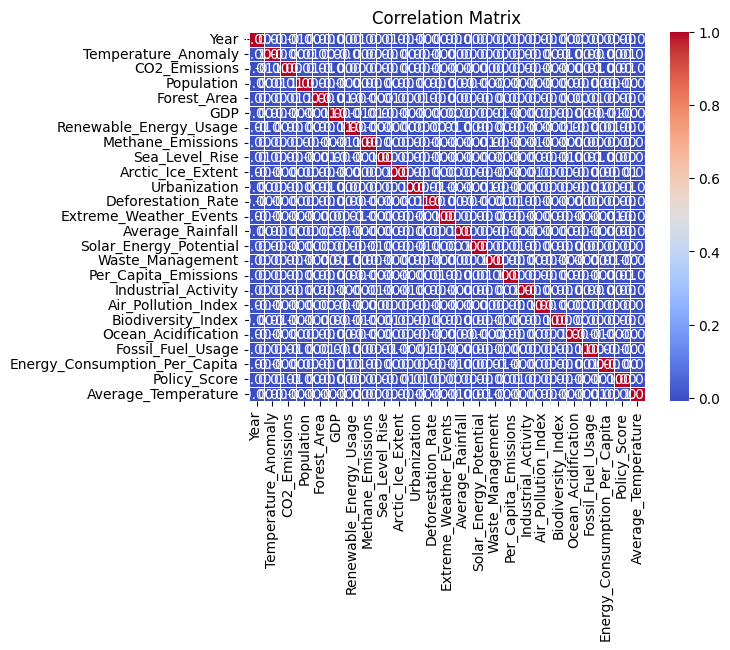

In [26]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Handle missing values (fill with the mean or drop)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

corr_matrix = df[numeric_cols].corr()

#correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

2.2 Time Trends Visualization

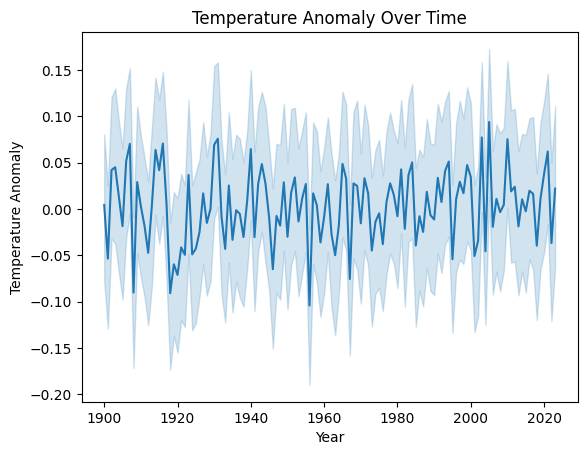

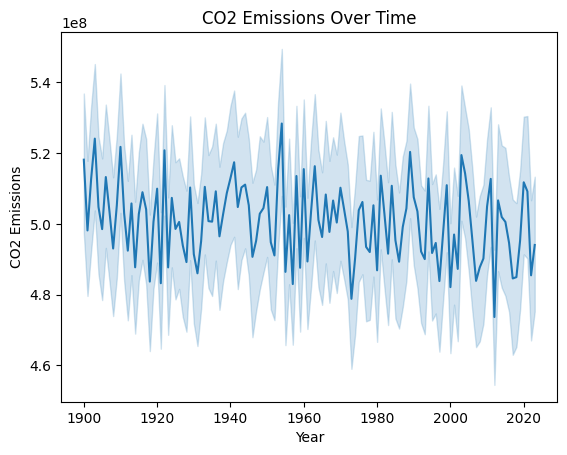

In [27]:
# temperature anomaly over time
sns.lineplot(x='Year', y='Temperature_Anomaly', data=df)
plt.title('Temperature Anomaly Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.show()

# CO2 emissions over time
sns.lineplot(x='Year', y='CO2_Emissions', data=df)
plt.title('CO2 Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.show()


2.3.Regression Analysis

In [ ]:
import statsmodels.api as sm

# linear regression between CO2 Emissions and Temperature Anomaly
X = df[['CO2_Emissions']]  
y = df['Temperature_Anomaly']  

X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Temperature_Anomaly   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.1111
Date:                 Thu, 30 Jan 2025   Prob (F-statistic):              0.739
Time:                         11:56:18   Log-Likelihood:            -1.5627e+05
No. Observations:               100000   AIC:                         3.125e+05
Df Residuals:                    99998   BIC:                         3.126e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0048      0.007      0.651      0.515      -0.010       0.019
CO2_Emissions -4.215e-12   1.26e-11     -0.333      0.739    -2.9e-11    2.06e-11
==============================================================================
Omnibus:                    88952.324   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6003.610
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:                       1.800   Cond. No.                     1.16e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3. Prediction: 
Future Climate Trends

In [73]:
from sklearn.model_selection import train_test_split

X = df[['CO2_Emissions', 'GDP', 'Population', 'Deforestation_Rate']]
y = df['Temperature_Anomaly']

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initializing the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.336544707348227


In [19]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generating synthetic data for regression (you can replace this with your own dataset)
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, display the model's coefficients (slope and intercept)
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")



Mean Squared Error: 0.010420222653186971
Model Coefficients: [41.76613113]
Model Intercept: 0.0009922221422566935


Mean Squared Error: 0.010420222653186971


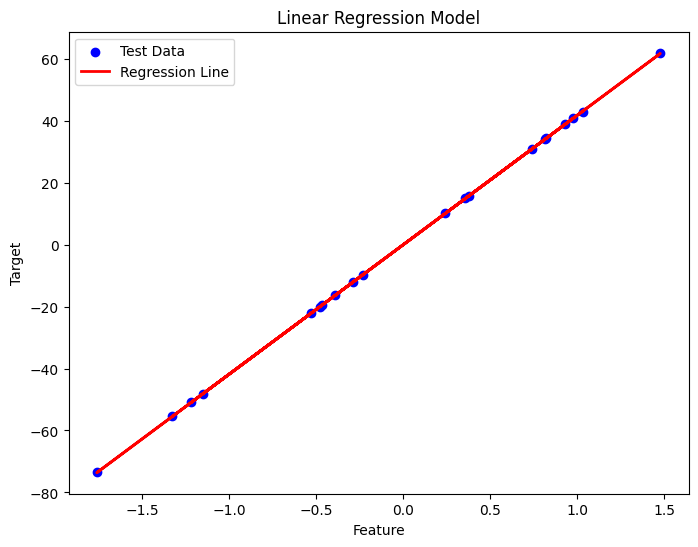

In [20]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generating synthetic data for regression (you can replace this with your own dataset)
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the data and the regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the test data points
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Model')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [28]:

# for future years ( next 10 years)
future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 11)
future_data = pd.DataFrame({
    'Year': future_years,
    'CO2_Emissions': [3000] * 10,  #
    'GDP': [30000] * 10,  
    'Population': [8.5] * 10,  
    'Deforestation_Rate': [0.03] * 10 
})

future_data['Year'] = future_data['Year'].astype(int)


In [40]:
# Check if the model was trained with one feature or more
print(model.n_features_in_)

# Adjust X_future to match the model's expected input
X_future = future_data[['CO2_Emissions']]  # Example: if the model expects only CO2_Emissions

# Predict using the adjusted features
future_predictions = model.predict(X_future)

# Add the predictions to the dataframe
future_data['Predicted_Temperature_Anomaly'] = future_predictions

# Display the predictions
print(future_data[['Year', 'Predicted_Temperature_Anomaly']])



1
   Year  Predicted_Temperature_Anomaly
0  2024                  125298.394392
1  2025                  125298.394392
2  2026                  125298.394392
3  2027                  125298.394392
4  2028                  125298.394392
5  2029                  125298.394392
6  2030                  125298.394392
7  2031                  125298.394392
8  2032                  125298.394392
9  2033                  125298.394392


C:\Users\kurra\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



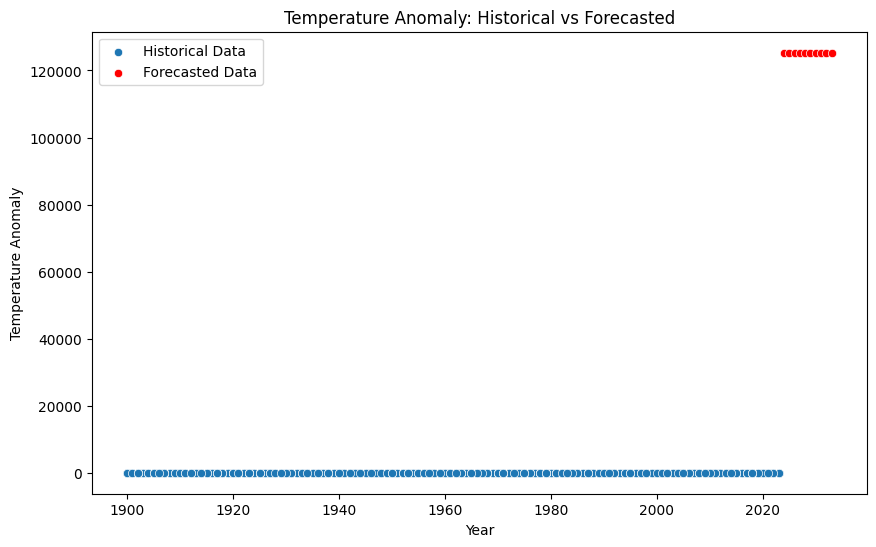

In [48]:
# Plot historical data along with forecasted values
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Year', y='Temperature_Anomaly', data=df, label='Historical Data')

sns.scatterplot(x=future_data['Year'], y=future_data['Predicted_Temperature_Anomaly'], label='Forecasted Data', color='red')

plt.title('Temperature Anomaly: Historical vs Forecasted')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()


In [42]:
from sklearn.metrics import r2_score

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")


R²: 0.9999925261586983


6. Building a Dashboard for visualization

In [11]:
import dash
from dash import dcc, html
import plotly.express as px


app = dash.Dash(__name__)

fig = px.bar(df, x='Year', y='CO2_Emissions', color='Year', 
             title='CO2 Emissions per Year', 
             color_continuous_scale='Viridis')

app.layout = html.Div([
    dcc.Graph(figure=fig)
])


if __name__ == '__main__':
    app.run_server(debug=True)
